In [1]:
import tensorflow as tf
import os

In [2]:
#Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [3]:
# data_dir = 'data'
data_dir = 'result2'

In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 757 files belonging to 2 classes.


In [6]:
data_iterator = data.as_numpy_iterator()

In [7]:
batch = data_iterator.next()

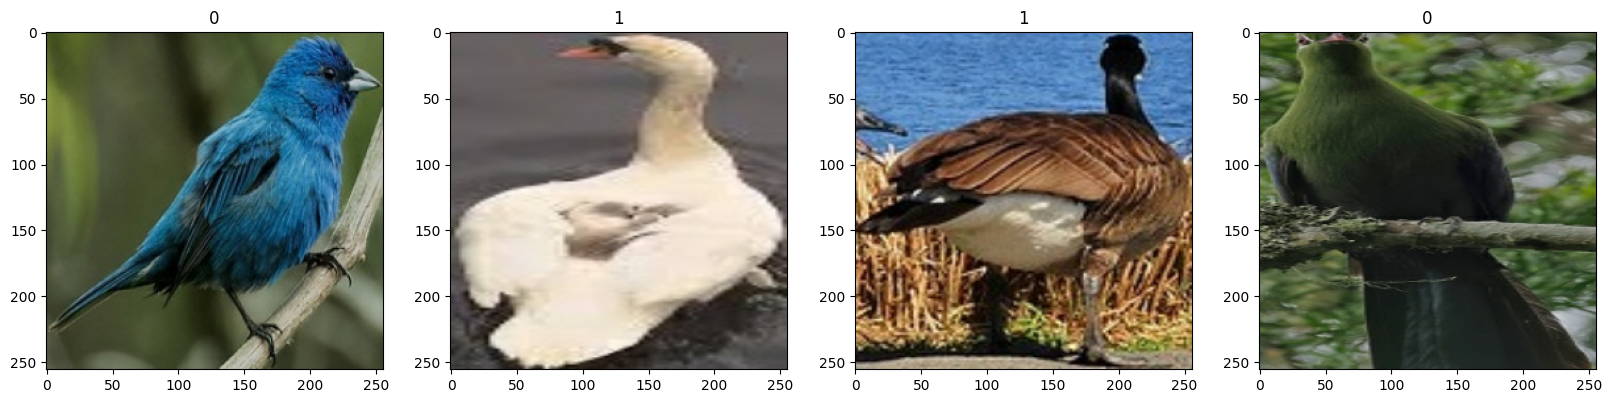

In [8]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [9]:
data = data.map(lambda x,y: (x/255, y))

In [10]:
data.as_numpy_iterator().next()

(array([[[[0.5137255 , 0.5137255 , 0.5058824 ],
          [0.5113664 , 0.5113664 , 0.5035233 ],
          [0.50980395, 0.50980395, 0.5019608 ],
          ...,
          [0.49019608, 0.48624387, 0.45618874],
          [0.49019608, 0.49019608, 0.45882353],
          [0.49019608, 0.49019608, 0.45882353]],
 
         [[0.51652116, 0.51652116, 0.508678  ],
          [0.51416206, 0.51416206, 0.5063189 ],
          [0.5125996 , 0.5125996 , 0.50475645],
          ...,
          [0.49113524, 0.48718303, 0.4571279 ],
          [0.49130997, 0.49130997, 0.45993742],
          [0.49299172, 0.49299172, 0.46161917]],
 
         [[0.5196921 , 0.5196921 , 0.511849  ],
          [0.51733303, 0.51733303, 0.5094899 ],
          [0.51577055, 0.51577055, 0.5079274 ],
          ...,
          [0.4962746 , 0.4882483 , 0.46092516],
          [0.49707887, 0.49094376, 0.46161625],
          [0.49820772, 0.4920726 , 0.4627451 ]],
 
         ...,
 
         [[0.60750616, 0.5919884 , 0.56641394],
          [0.61960

In [11]:
len(data)

24

In [12]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+2
test_size = int(len(data)*.1)

In [13]:
print(str(train_size) + ' ' + str(val_size) + ' ' + str(test_size) + ' = ' + str(train_size+val_size+test_size))

16 6 2 = 24


In [14]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [28]:
model = Sequential()

In [29]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 conv2d_11 (Conv2D)          (None, 256, 256, 16)      2320      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 126, 126, 32)      4640      
                                                                 
 conv2d_13 (Conv2D)          (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                  

In [32]:
logdir = 'logs'

In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [34]:
hist = model.fit(train, epochs=15, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/15
16/16 [==============================] - 37s 2s/step - loss: 3.4422 - accuracy: 0.4902 - val_loss: 0.7353 - val_accuracy: 0.4792
Epoch 2/15
16/16 [==============================] - 36s 2s/step - loss: 0.6745 - accuracy: 0.4746 - val_loss: 0.6549 - val_accuracy: 0.4583
Epoch 3/15
16/16 [==============================] - 36s 2s/step - loss: 0.6384 - accuracy: 0.4844 - val_loss: 0.6107 - val_accuracy: 0.4792
Epoch 4/15
16/16 [==============================] - 38s 2s/step - loss: 0.5621 - accuracy: 0.4824 - val_loss: 0.5089 - val_accuracy: 0.4323
Epoch 5/15
16/16 [==============================] - 42s 3s/step - loss: 0.5303 - accuracy: 0.4922 - val_loss: 0.5084 - val_accuracy: 0.4948
Epoch 6/15
16/16 [==============================] - 39s 2s/step - loss: 0.4669 - accuracy: 0.4902 - val_loss: 0.3945 - val_accuracy: 0.4688
Epoch 7/15
16/16 [==============================] - 40s 2s/step - loss: 0.3417 - accuracy: 0.4785 - val_loss: 0.2530 - val_accuracy: 0.4271
Epoch 8/15
16/16 [==

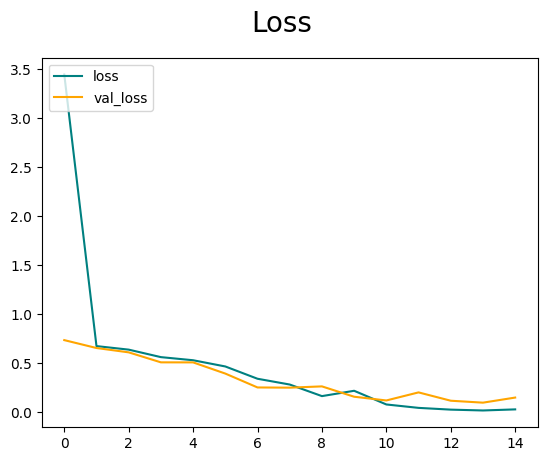

In [35]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

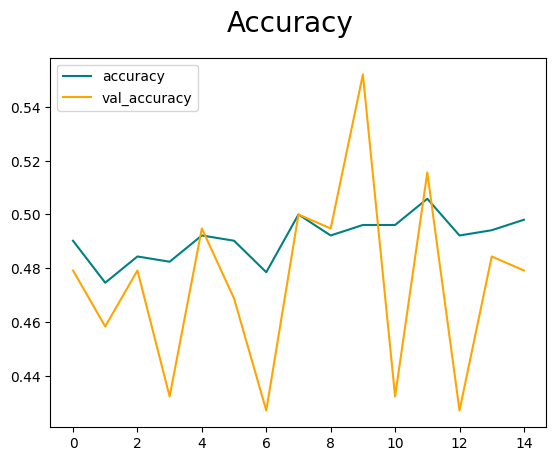

In [36]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [27]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [28]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [29]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 190ms/step


In [30]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.88, shape=(), dtype=float32) tf.Tensor(0.9433962, shape=(), dtype=float32)


In [33]:
import cv2

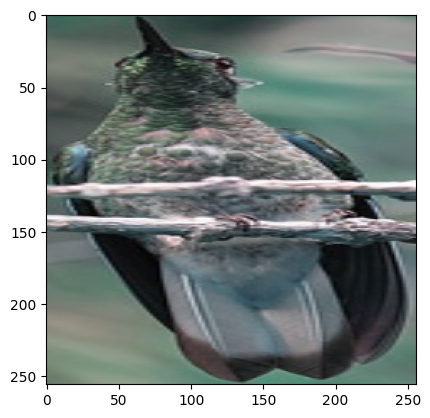

1/1 [==============================] - 0s 35ms/step
[[2.1343907e-10]]
Predicted class is bird


In [43]:
img = cv2.imread('result2\\bird\\68.jpg')
# img = cv2.imread('Image\\test_likebird2.jpg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model.predict(np.expand_dims(resize/255, 0))
print(yhat)
if yhat > 0.5: 
    print(f'Predicted class is not bird')
else:
    print(f'Predicted class is bird')

In [31]:
from tensorflow.keras.models import load_model

In [32]:
model.save(os.path.join('models','birdLB2.h5'))